In [1]:

import numpy as np
import pandas as pd
import csv
import xlrd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScalfind accuraceer
dataset=pd.read_excel(r"accident_data_2016_(10,000).xlsx")
dataset.head()


,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_year,Day_of_Week,Hour,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Weather_Conditions,Road_Surface_Conditions,Accident
0,-0.279323,51.584754,3,2,1,19,3,7,28,3,4006,30.0,Fine without high winds,Dry,1
1,-0.043075,51.512977,3,2,1,12,3,14,5,3,13,20.0,Fine without high winds,Dry,1
2,-0.085288,51.616370,3,2,1,4,3,8,32,6,0,30.0,Fine without high winds,Dry,1
3,-0.205252,51.357839,3,2,2,7,3,23,21,6,0,30.0,Fine without high winds,Dry,1
4,-0.363701,51.582544,3,4,3,35,3,10,29,3,4090,30.0,Fine without high winds,Dry,1


[ 0  0  0 ... -1 -1 24]
Estimated number of clusters: 25
Estimated number of noise points: 134


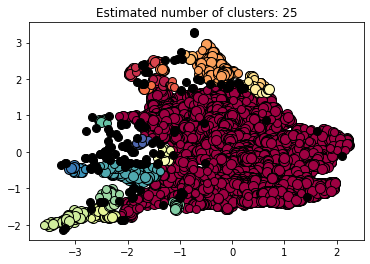

In [3]:
X=dataset.iloc[:,[0,1]]

X = StandardScaler().fit_transform(X)


db = DBSCAN(eps=0.1009, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [7]:
import openpyxl
fields = ["Longitude","Latitude","Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Day_of_year","Day_of_Week","Hour","Local_Authority_(District)","1st_Road_Class","1st_Road_Number","Speed_limit","Weather_Conditions","Road_Surface_Conditions","Accident"]
pd.DataFrame(dataset,db.labels_+1).to_excel("all_labeled_data.xlsx", header=fields,index="labels")

In [8]:
dataset1=pd.read_excel(r"all_labeled_data.xlsx")
dataset1.head()

,Unnamed: 0,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_year,Day_of_Week,Hour,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Weather_Conditions,Road_Surface_Conditions,Accident
0,1,-0.043075,51.512977,3,2,1,12,3,14,5,3,13,20,Fine without high winds,Dry,1
1,1,-0.043075,51.512977,3,2,1,12,3,14,5,3,13,20,Fine without high winds,Dry,1
2,1,-0.043075,51.512977,3,2,1,12,3,14,5,3,13,20,Fine without high winds,Dry,1
3,1,-0.043075,51.512977,3,2,1,12,3,14,5,3,13,20,Fine without high winds,Dry,1
4,1,-0.043075,51.512977,3,2,1,12,3,14,5,3,13,20,Fine without high winds,Dry,1


In [10]:
df_filtered = dataset1[dataset1['Unnamed: 0'] != 0]

In [11]:
print(df_filtered.head(15))

    Unnamed: 0  Longitude   Latitude  Accident_Severity  Number_of_Vehicles  \
0            1  -0.043075  51.512977                  3                   2   
1            1  -0.043075  51.512977                  3                   2   
2            1  -0.043075  51.512977                  3                   2   
3            1  -0.043075  51.512977                  3                   2   
4            1  -0.043075  51.512977                  3                   2   
5            1  -0.043075  51.512977                  3                   2   
6            1  -0.043075  51.512977                  3                   2   
7            1  -0.043075  51.512977                  3                   2   
8            1  -0.043075  51.512977                  3                   2   
9            1  -0.043075  51.512977                  3                   2   
10           1  -0.043075  51.512977                  3                   2   
11           1  -0.043075  51.512977                

In [16]:
fields1=["Cluster","Longitude","Latitude","Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Day_of_year","Day_of_Week","Hour","Local_Authority_(District)","1st_Road_Class","1st_Road_Number","Speed_limit","Weather_Conditions","Road_Surface_Conditions","Accident"]  

pd.DataFrame(df_filtered).to_csv("clustered_data.csv", header=fields1,index=None)
#pd.DataFrame(df_filtered).to_csv("clustered_data.csv")



In [13]:



"Longitude","Latitude","Accident_Severity","Number_of_Vehicles","Number_of_Casualties","Day_of_year","Day_of_Week","Hour","Local_Authority_(District)","1st_Road_Class","1st_Road_Number","Speed_limit","Weather_Conditions","Road_Surface_Conditions","Accident"


('Longitude',
 'Latitude',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_year',
 'Day_of_Week',
 'Hour',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Speed_limit',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Accident')